In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
fp = r'C:\Users\b1090197\OneDrive\Documents\XSki\xski\files\sections.csv'
sec = pd.read_csv(fp, sep=';', decimal=',')

In [20]:
sec

,Section,Latitude,Longitude,slope
0,start,46.282000,11.527000,down
1,end,46.281475,11.522780,down
2,start,46.281210,11.522300,up
3,end,46.281030,11.521998,up
4,start,46.281030,11.521998,down
5,end,46.280850,11.521650,down
6,start,46.280850,11.521650,turn
7,end,46.281200,11.521380,turn
8,start,46.281200,11.521380,up
9,end,46.281370,11.521640,up


In [11]:
dp = r'C:\Users\b1090197\Documents\Case Study Kit\Recordings\P7\MVNX\easy_round_gps.csv'
df = pd.read_csv(dp, index_col=0)
df

,Latitude,Longitude,Altitude
Frame,,,
0,46.282399,11.523759,1.25
1,46.282399,11.523759,1.25
2,46.282399,11.523759,1.25
3,46.282399,11.523759,1.25
4,46.282399,11.523759,1.25
...,...,...,...
57722,46.282410,11.523798,1.25
57723,46.282410,11.523798,1.25
57724,46.282410,11.523798,1.25


In [12]:
df[abs(df['Latitude']-sec['Latitude'].iloc[0])]

,Latitude,Longitude,Altitude
Frame,,,


In [ ]:
# example
# p13 = v['P13']['medium'].values
# v['P13'].apply(lambda x: x- p13, axis=0)

In [17]:
lat1 = sec['Latitude'].iloc[0]
long1 = sec['Longitude'].iloc[0]


11.527

In [23]:
x1 = sec.loc[8]['Longitude']
y1 = sec.loc[8]['Latitude']
x2 = sec.loc[9]['Longitude']
y2 = sec.loc[9]['Latitude']

In [64]:
dy = (y2-y1)
dx = (x2-x1)
dx

0.0002599999999990388

In [44]:
m = dy/dx
m

0.6538461538648108

In [62]:
x = np.arange(0,.001,.0001)
y = m*x

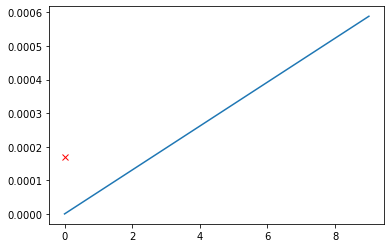

In [63]:
plt.plot(y)
plt.plot(dx,dy,'rx')

In [70]:
x = np.array([sec.loc[8]['Longitude'], sec.loc[9]['Longitude'], sec.loc[11]['Longitude']])
y = np.array([sec.loc[8]['Latitude'], sec.loc[9]['Latitude'], sec.loc[11]['Latitude']])

In [71]:
offset_x = x[0]
offset_y = y[0]

In [72]:
x = x-offset_x
y = y-offset_y

In [73]:
y

array([0.     , 0.00017, 0.00077])

In [74]:
x

array([0.     , 0.00026, 0.00072])

In [75]:
# geradengleichung
m = y[1]/x[1]

In [83]:
t = np.arange(0,0.001,0.000001)
ft = t * m

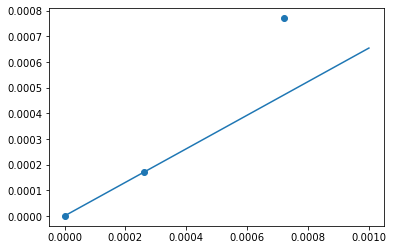

In [84]:
plt.plot(t,ft)
plt.scatter(x,y)

In [93]:
np.min(np.sqrt((x[2]-t)**2 + (y[2]-ft)**2))+offset_x

11.52163044707066

In [94]:
ft[857]+offset_y

46.28176034615386

In [96]:
# find projection
fp = r'C:\Users\b1090197\Documents\Case Study Kit\Recordings\P7\MVNX\hard_round_gps.csv'
gps = pd.read_csv(fp, index_col=0)
gps

,Latitude,Longitude,Altitude
Frame,,,
0,46.282403,11.523813,1.25
1,46.282403,11.523813,1.25
2,46.282403,11.523813,1.25
3,46.282403,11.523813,1.25
4,46.282403,11.523813,1.25
...,...,...,...
46430,46.282407,11.523842,1.25
46431,46.282407,11.523842,1.25
46432,46.282407,11.523842,1.25


In [97]:
lat_p = y[2]
long_p = x[2]


In [99]:
np.argmin(np.sqrt((long_p-gps['Longitude'].values)**2 + (lat_p-gps['Latitude'].values)**2))

30591

In [100]:
def find_projection_index(gps, long_p, lat_p):
    return np.argmin(np.sqrt((long_p-gps['Longitude'].values)**2 + (lat_p-gps['Latitude'].values)**2))

In [103]:
gps.loc[find_projection_index(gps, long_p, lat_p)].iloc[:2]

Latitude     46.280681
Longitude    11.521179
Name: 30591, dtype: float64